# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.14 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import gym
import random
# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)


### 4. It's your turn!

4. Now it's your turn! It's your turn to train your own agents to solve environmental problems. A few important notes**.
- When training the environment, make sure that you set `train_mode=True` and that the line to reset the environment looks like this
The line to reset the environment will look like this: ``python
env_info = env.reset(train_mode=True)[brain_name].
````
- To configure your work, you can work directly in this Jupyter notebook, or you can start over with a new file. The list of files in the workspace can be seen by clicking **_Jupyter_** in the upper left corner of the notebook.
- In this coding environment, we can't see the agents while they are training. However, **_after the agents_**, you can download the saved model weights and view the agents on your own machine! 

Episode 229	Average Score: 30.18
Environment solved in 229 episodes!	Average Score: 30.18


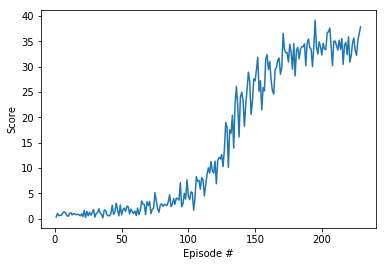

In [7]:
from collections import deque
from ddpg_agent import Agent

state_size = states.shape[1]
action_size = brain.vector_action_space_size
agent = Agent(state_size, action_size, random_seed=2)


def DDPG_TRAIN(n_episodes=1000, max_t=300):
    scores_deque = deque(maxlen=print_every)
    scores = []
 
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]          # reset the Environment
        state = env_info.vector_observations                       # get the initial state
        score = np.zeros(num_agents)                               # initialize the scores
        agent.reset()                                              # reset the Agent
        
        while True:
            actions = agent.act(state)
            env_info = env.step(actions)[brain_name]               # send the action to the environment
            next_state = env_info.vector_observations              # get the next state
            reward = env_info.rewards                              # get the reward
            done = env_info.local_done                             # see if episode has finished
            agent.step(state, actions, reward, next_state, done)   # Update the Agent
            state = next_state                                     # Transition to Next State
            score += env_info.rewards                              # Accumulate rewards for the Episode
            if np.any(done):                                       # exit loop if episode finished
                break
                
        scores_deque.append(score)                                 # Store each Episode's Score for last 100
        scores.append(score)                                       # Store each Episode's Score
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores

scores = DDPG_TRAIN()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()